# <center><div style="font-family: Trebuchet MS; background-color: #800080; color: #FFFFFF; padding: 12px; line-height: 1;">Title : Heart Failure Detection</div></center>



## **<span style="color:Purple">Problem Statement :</span>**
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## **<span style="color:Purple">Aim : </span>**
- To classify / predict whether a patient is prone to heart failure depending on multiple attributes.
- It is a **binary classification** with multiple numerical and categorical features.

## **<span style="color:Purple">Dataset Attributes : </span>**
    
- **Age** : age of the patient [years]
- **Sex** : sex of the patient [M: Male, F: Female]
- **ChestPainType** : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP** : resting blood pressure [mm Hg]
- **Cholesterol** : serum cholesterol [mm/dl]
- **FastingBS** : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG** : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR** : maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina** : exercise-induced angina [Y: Yes, N: No]
- **Oldpeak** : oldpeak = ST [Numeric value measured in depression]
- **ST_Slope** : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease** : output class [1: heart disease, 0: Normal]

## **<span style="color:Purple">Import the Necessary Libraries : </span>**


In [1]:
import pandas as pd


In [3]:
data = pd.read_csv('C:\\Users\\khamani\\Downloads\\Hearfailure\\heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## **<span style="color:Purple">Data Info : </span>**


In [4]:
data.shape

(918, 12)

In [5]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


- **No null values** present in the data!

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

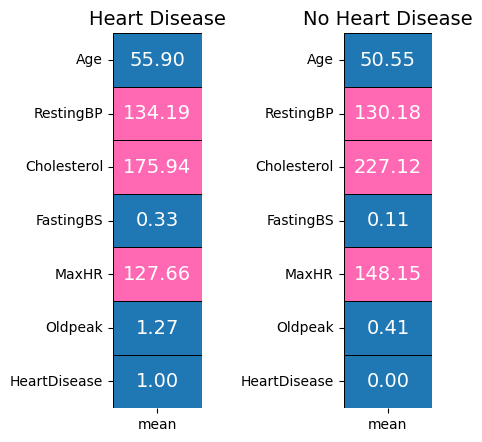

In [17]:
yes = data[data['HeartDisease'] == 1].describe().T
no = data[data['HeartDisease'] == 0].describe().T
colors = ['#1F77B4','#FF69B4']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

- **Mean** values of all the features for cases of heart diseases and non-heart diseases.

# <center><div style="font-family: Trebuchet MS; background-color: #800080; color: #FFFFFF; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center>

## **<span style="color:Purple">Dividing features into Numerical and Categorical : </span>**


In [11]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


- Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a numerical feature.
- Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.

**Eg :** datatype = integer, attribute = numerical feature ; datatype = string, attribute = categorical feature

- For this dataset, as the number of features are less, we can manually check the dataset as well.

## **<span style="color:Purple">Distribution Features : </span>**


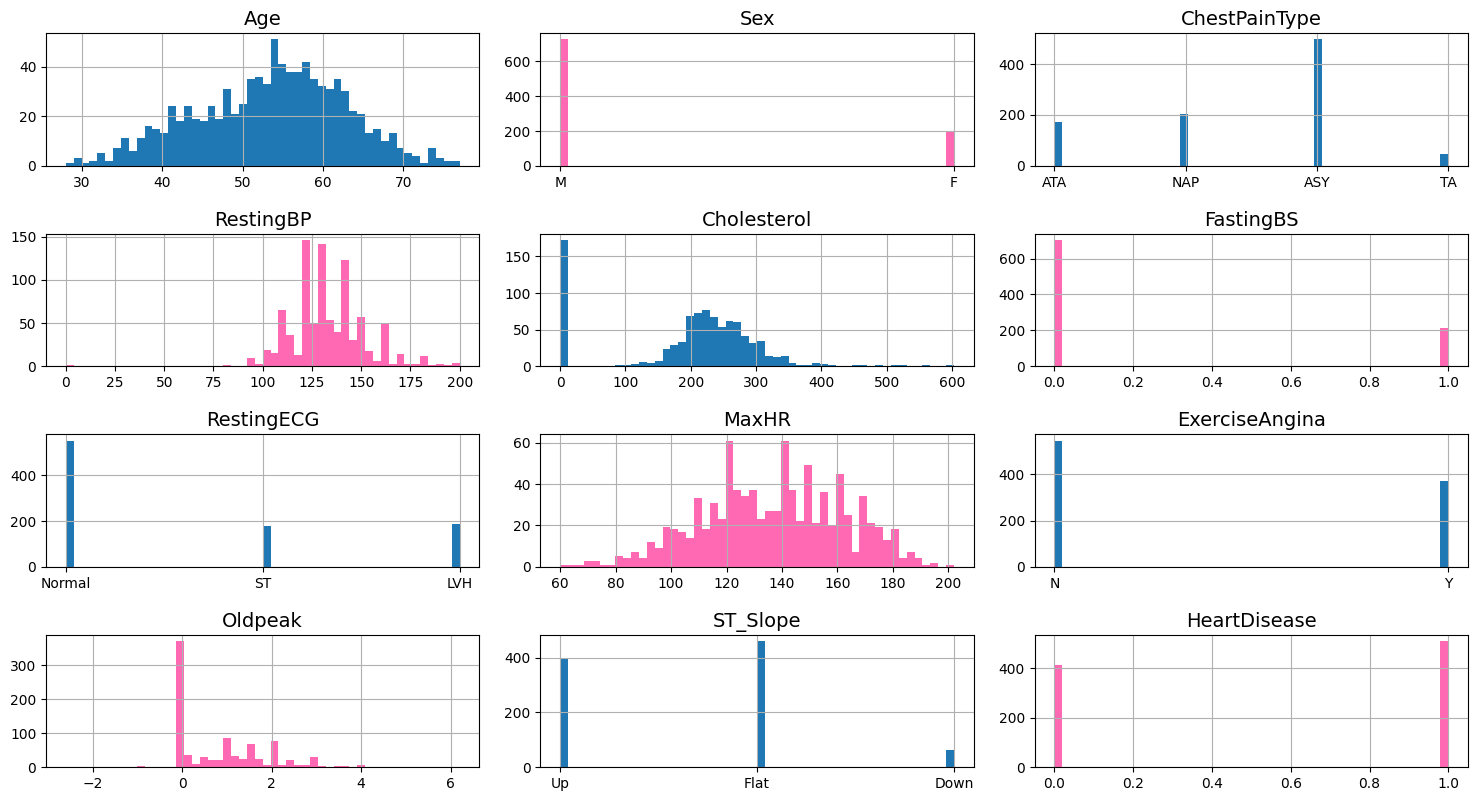

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Define the color palette
colors = ['#1F77B4', '#FF69B4']  # Red and yellow

# Number of columns in the data
data_columns = data.columns

# Create subplots grid based on the number of columns
fig, axs = plt.subplots(nrows=len(data_columns)//3 + 1, ncols=3, figsize=(15, 10))
axs = axs.flatten()  # Flatten to make iteration easier

# Loop over each column and plot the histogram with alternating colors
for i, col in enumerate(data_columns):
    ax = axs[i]
    data[col].hist(bins=50, ax=ax, color=colors[i % len(colors)])  # Alternate between red and yellow
    ax.set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



## **<span style="color:Purple">Target Variable Visualization (HeartDisease): </span>**


C:\Users\khamani\AppData\Local\Temp\ipykernel_19524\86802573.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='HeartDisease', data=data, palette=colors, edgecolor='black')
C:\Users\khamani\AppData\Local\Temp\ipykernel_19524\86802573.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])


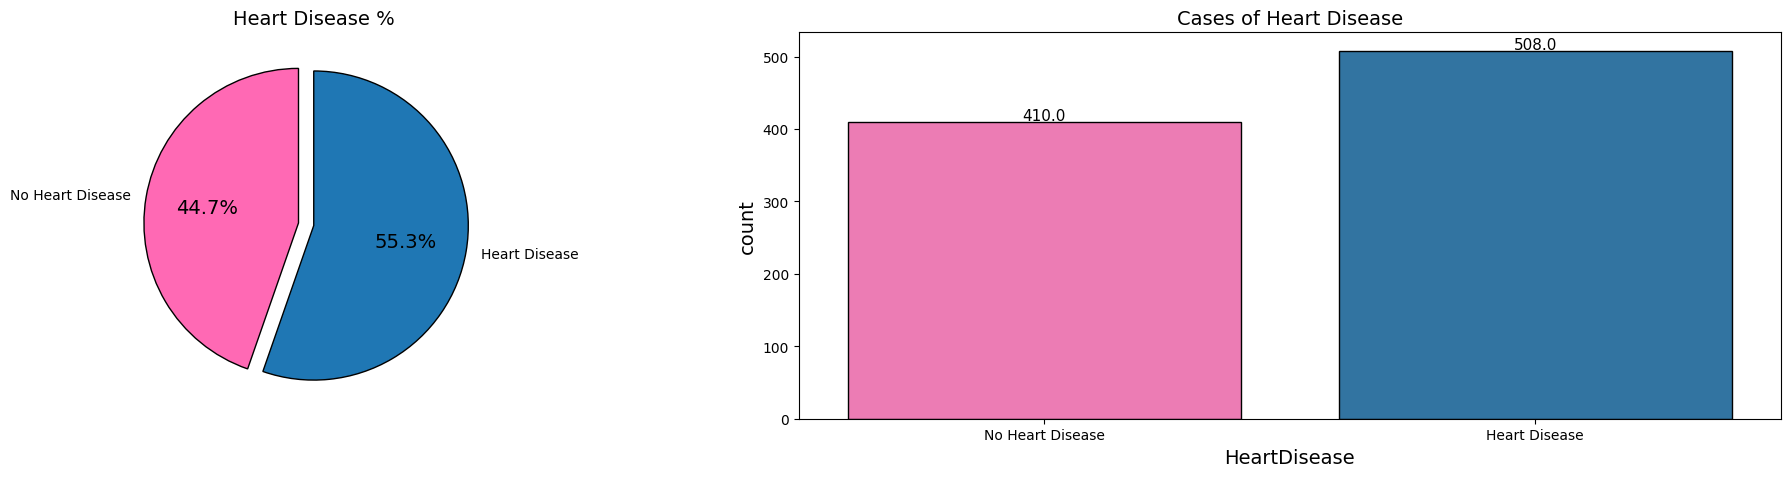

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data (replace this with your actual data)
# data = pd.read_csv('path_to_your_file.csv')

# Define color palette
colors = ['#FF69B4','#1F77B4']

# Calculate percentages for the pie chart
l = list(data['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Pie chart
plt.subplot(1, 2, 1)
plt.pie(circle, 
        labels=['No Heart Disease', 'Heart Disease'], 
        autopct='%1.1f%%', 
        startangle=90, 
        explode=(0.1, 0), 
        colors=colors, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Heart Disease %')

# Bar plot
plt.subplot(1, 2, 2)
ax = sns.countplot(x='HeartDisease', data=data, palette=colors, edgecolor='black')

# Add labels on the bars
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), 
            horizontalalignment='center', fontsize=11)

# Set custom labels for x-axis
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
plt.title('Cases of Heart Disease')

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


- The dataset is pretty much **evenly balanced!**

## **<span style="color:Purple">Categorical Features vs Target Variable (HeartDisease) : </span>**


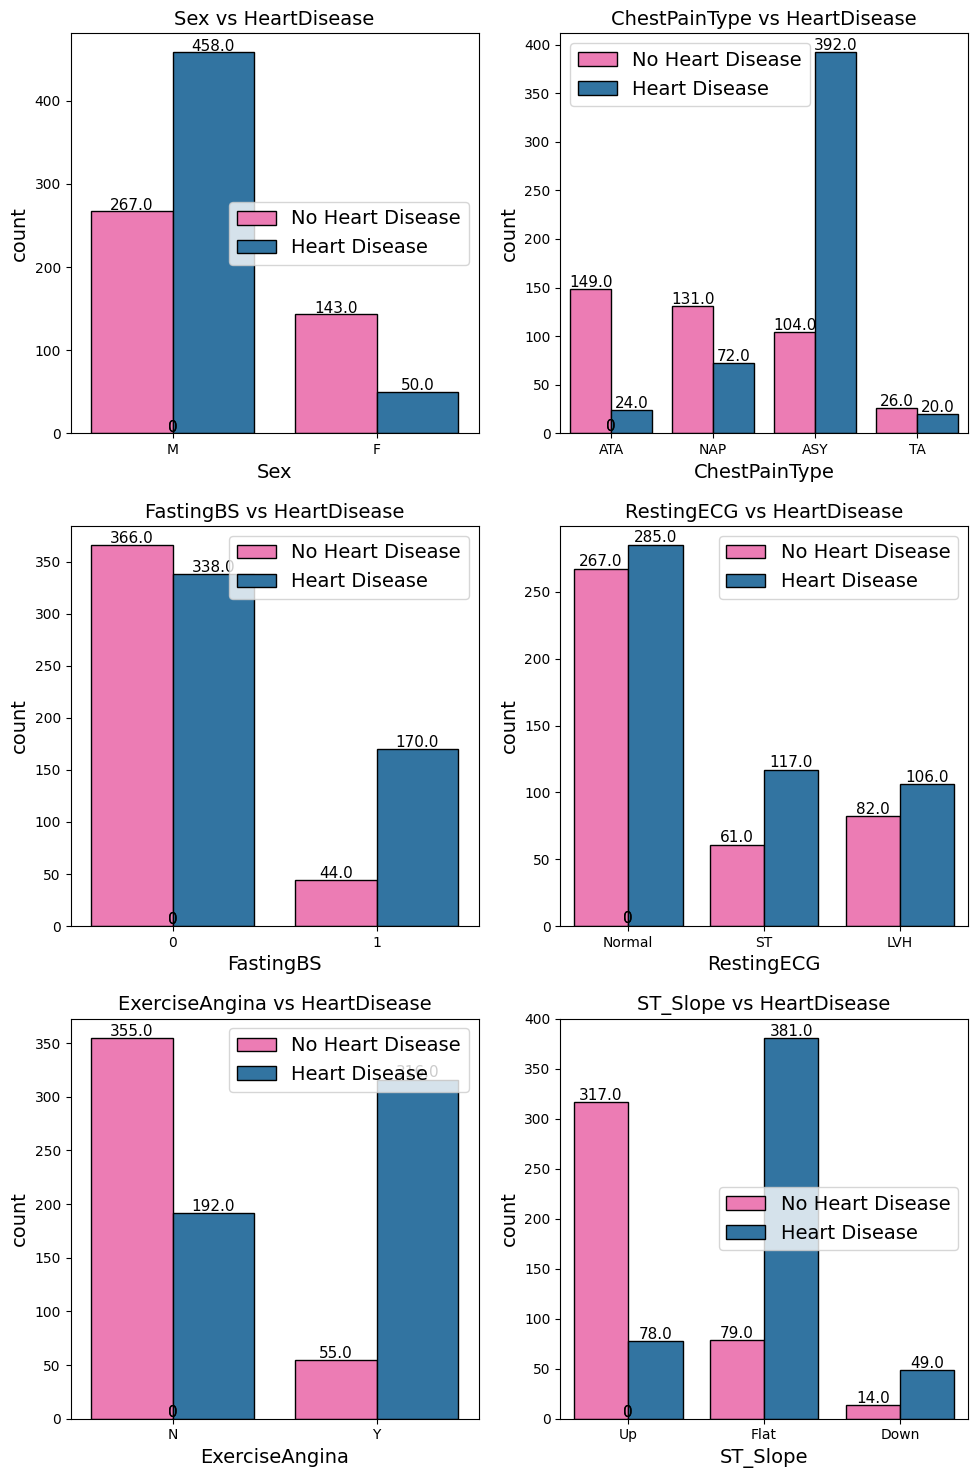

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace this with your actual data)
# categorical_features = ['feature1', 'feature2', ...]
# colors = ['#F93822', '#FDD20E']  # Red and yellow

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))  # Create the grid of subplots
axs = axs.flatten()  # Flatten the 2D array of axes to make indexing easier

# Loop over the categorical features
for i in range(len(categorical_features) - 1):
    ax = axs[i]  # Select the current subplot axis
    sns.countplot(x=categorical_features[i], data=data, hue="HeartDisease", palette=colors, edgecolor='black', ax=ax)
    
    # Add count labels on top of bars
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), 
                horizontalalignment='center', fontsize=11)
    
    # Set title for the current subplot
    title = categorical_features[i] + ' vs HeartDisease'
    ax.set_title(title)
    ax.legend(['No Heart Disease', 'Heart Disease'])

# Adjust layout
plt.tight_layout()
plt.show()


- **Male** population has more heart disease patients than no heart disease patients. In the case of **Female** population, heart disease patients are less than no heart disease patients. 
- **ASY** type of chest pain boldly points towards major chances of heart disease.
- **Fasting Blood Sugar** is tricky! Patients diagnosed with Fasting Blood Sugar and no Fasting Blood Sugar have significant heart disease patients. 
- **RestingECG** does not present with a clear cut category that highlights heart disease patients. All the 3 values consist of high number of heart disease patients.
- **Exercise Induced Engina** definitely bumps the probability of being diagnosed with heart diseases.
- With the **ST_Slope** values, **flat** slope displays a very high probability of being diagnosed with heart disease. **Down** also shows the same output but in very few data points. 

## **<span style="color:Purple">Categorical Features vs Positive Heart Disease Cases : </span>**


In [15]:
# Function to calculate percentages safely
def calculate_percentages(value_counts, total):
    return [(value_counts.get(i, 0) / total * 100) for i in range(len(value_counts.index))]

# Calculate percentages for each feature related to heart disease
total_heart_disease = data['HeartDisease'].sum()  # Total count of heart disease cases

# Sex percentages
sex_counts = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex_percentages = calculate_percentages(sex_counts, total_heart_disease)

# Chest Pain Type percentages
cp_counts = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp_percentages = calculate_percentages(cp_counts, total_heart_disease)

# Fasting Blood Sugar percentages
fbs_counts = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs_percentages = calculate_percentages(fbs_counts, total_heart_disease)

# Resting ECG percentages
restecg_counts = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg_percentages = calculate_percentages(restecg_counts, total_heart_disease)

# Exercise Angina percentages
exang_counts = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang_percentages = calculate_percentages(exang_counts, total_heart_disease)

# ST Slope percentages
slope_counts = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope_percentages = calculate_percentages(slope_counts, total_heart_disease)

# Print the results
print("Sex Percentages:", sex_percentages)
print("Chest Pain Type Percentages:", cp_percentages)
print("Fasting Blood Sugar Percentages:", fbs_percentages)
print("Resting ECG Percentages:", restecg_percentages)
print("Exercise Angina Percentages:", exang_percentages)
print("ST Slope Percentages:", slope_percentages)



Sex Percentages: [np.float64(90.15748031496062), np.float64(9.84251968503937)]
Chest Pain Type Percentages: [np.float64(77.16535433070865), np.float64(14.173228346456693), np.float64(4.724409448818897), np.float64(3.937007874015748)]
Fasting Blood Sugar Percentages: [np.float64(66.53543307086615), np.float64(33.46456692913386)]
Resting ECG Percentages: [np.float64(56.10236220472441), np.float64(23.031496062992126), np.float64(20.866141732283463)]
Exercise Angina Percentages: [np.float64(62.20472440944882), np.float64(37.79527559055118)]
ST Slope Percentages: [np.float64(75.0), np.float64(15.354330708661418), np.float64(9.645669291338582)]


C:\Users\khamani\AppData\Local\Temp\ipykernel_19524\632825103.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return [(value_counts.get(i, 0) / total * 100) for i in range(len(value_counts.index))]
C:\Users\khamani\AppData\Local\Temp\ipykernel_19524\632825103.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return [(value_counts.get(i, 0) / total * 100) for i in range(len(value_counts.index))]
C:\Users\khamani\AppData\Local\Temp\ipykernel_19524\632825103.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consiste

C:\Users\khamani\AppData\Local\Temp\ipykernel_19524\2149565883.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return [(value_counts.get(i, 0) / total * 100) for i in range(len(value_counts.index))]
C:\Users\khamani\AppData\Local\Temp\ipykernel_19524\2149565883.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return [(value_counts.get(i, 0) / total * 100) for i in range(len(value_counts.index))]
C:\Users\khamani\AppData\Local\Temp\ipykernel_19524\2149565883.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consi

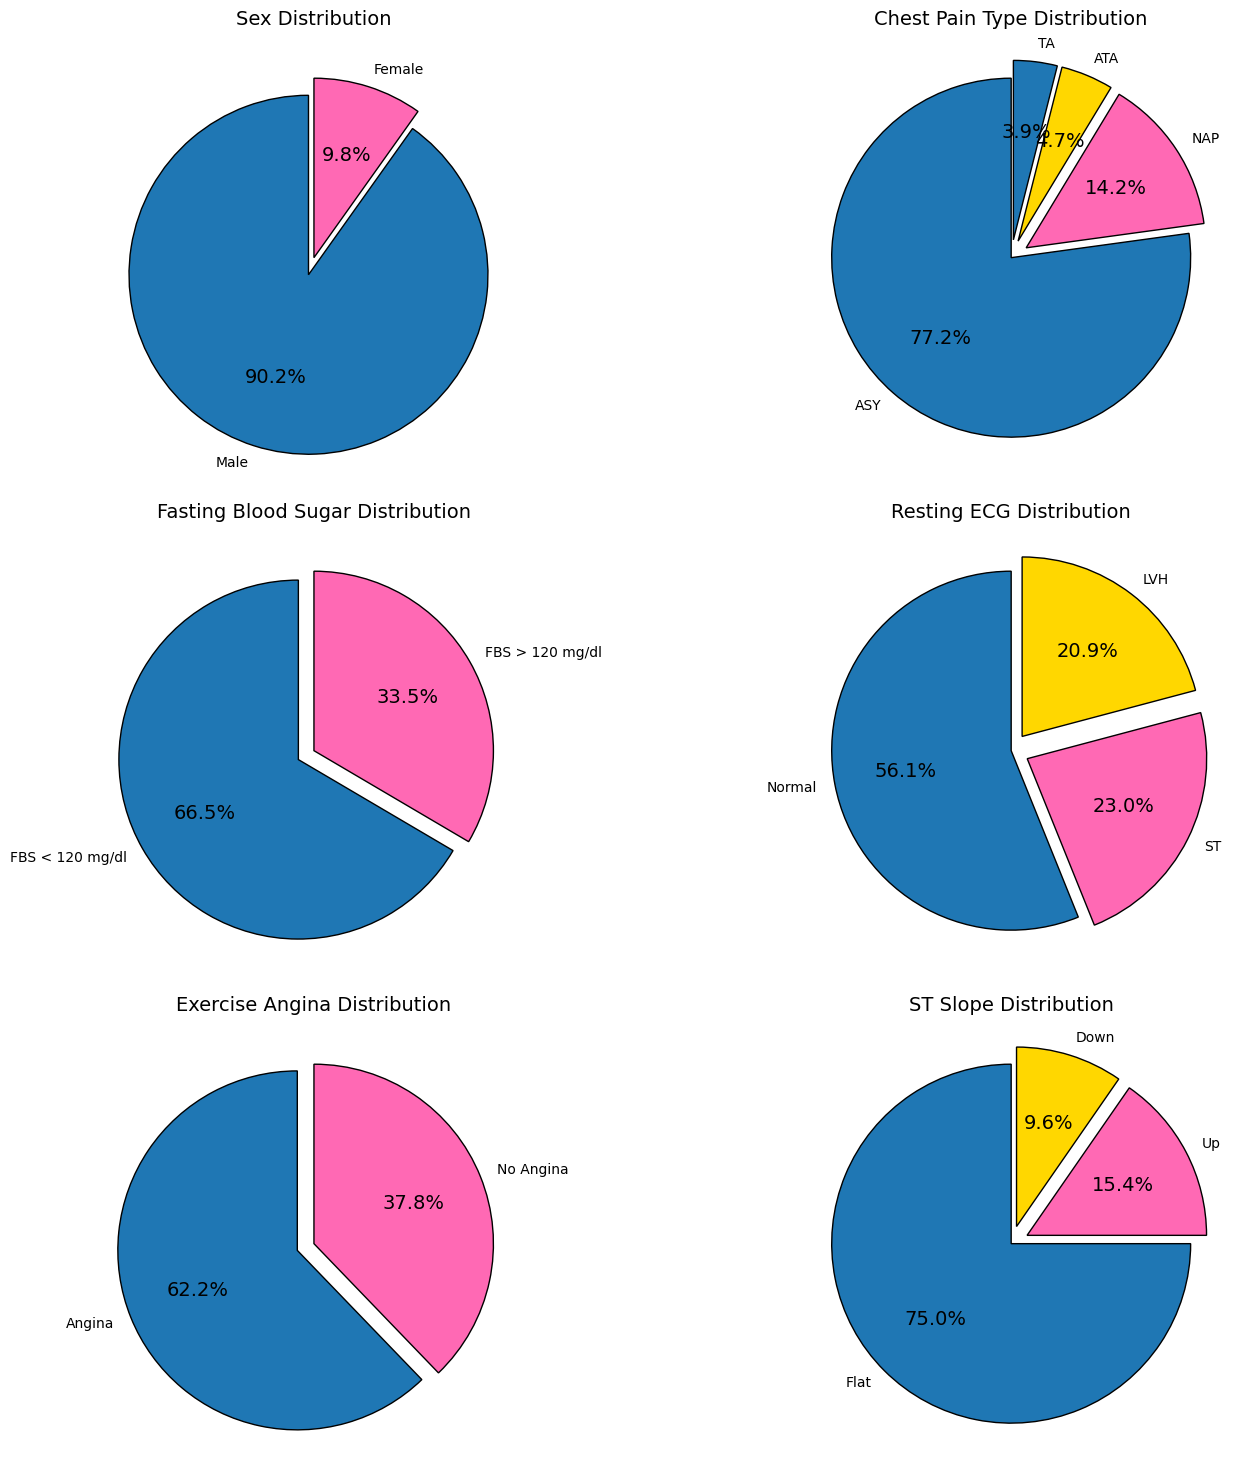

In [24]:
import matplotlib.pyplot as plt

# Function to calculate percentages safely
def calculate_percentages(value_counts, total):
    return [(value_counts.get(i, 0) / total * 100) for i in range(len(value_counts.index))]

# Assuming `data` is your DataFrame
total_heart_disease = data['HeartDisease'].sum()  # Total count of heart disease cases

# Calculate percentages for each feature related to heart disease
sex_counts = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex_percentages = calculate_percentages(sex_counts, total_heart_disease)
sex_labels = ['Male', 'Female']

cp_counts = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp_percentages = calculate_percentages(cp_counts, total_heart_disease)
cp_labels = ['ASY', 'NAP', 'ATA', 'TA']

fbs_counts = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs_percentages = calculate_percentages(fbs_counts, total_heart_disease)
fbs_labels = ['FBS < 120 mg/dl', 'FBS > 120 mg/dl']

restecg_counts = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg_percentages = calculate_percentages(restecg_counts, total_heart_disease)
restecg_labels = ['Normal', 'ST', 'LVH']

exang_counts = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang_percentages = calculate_percentages(exang_counts, total_heart_disease)
exang_labels = ['Angina', 'No Angina']

slope_counts = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope_percentages = calculate_percentages(slope_counts, total_heart_disease)
slope_labels = ['Flat', 'Up', 'Down']

# Define colors for the pie charts
colors = ['#1F77B4', '#FF69B4', '#1F77B4', '#FF69B4', '#FFD700']

# Create subplots for the pie charts
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axs = axs.flatten()  # Flatten the 2D array of axes to make indexing easier

# Create pie charts for each feature
axs[0].pie(sex_percentages, labels=sex_labels, autopct='%1.1f%%', startangle=90,
           explode=(0.1, 0), colors=colors[:2], 
           wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axs[0].set_title('Sex Distribution')

axs[1].pie(cp_percentages, labels=cp_labels, autopct='%1.1f%%', startangle=90,
           explode=(0, 0.1, 0.1, 0.1), colors=colors[2:6], 
           wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axs[1].set_title('Chest Pain Type Distribution')

axs[2].pie(fbs_percentages, labels=fbs_labels, autopct='%1.1f%%', startangle=90,
           explode=(0.1, 0), colors=colors[:2], 
           wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axs[2].set_title('Fasting Blood Sugar Distribution')

axs[3].pie(restecg_percentages, labels=restecg_labels, autopct='%1.1f%%', startangle=90,
           explode=(0, 0.1, 0.1), colors=colors[2:5], 
           wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axs[3].set_title('Resting ECG Distribution')

axs[4].pie(exang_percentages, labels=exang_labels, autopct='%1.1f%%', startangle=90,
           explode=(0.1, 0), colors=colors[:2], 
           wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axs[4].set_title('Exercise Angina Distribution')

axs[5].pie(slope_percentages, labels=slope_labels, autopct='%1.1f%%', startangle=90,
           explode=(0, 0.1, 0.1), colors=colors[2:5], 
           wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axs[5].set_title('ST Slope Distribution')

# Hide any empty subplots (if any)
if len(axs) > 6:
    for ax in axs[6:]:
        ax.axis('off')  # Turn off axis for unused subplots

# Adjust layout
plt.tight_layout()
plt.show()



- Out of all the heart disease patients, a staggering 90% patients are **male**.
- When it comes to the type of chest pain, **ASY** type holds the majority with 77% that lead to heart diseases.
- **Fasting Blood Sugar** level < 120 mg/dl displays high chances of heart diseases.
- For **RestingECG**, **Normal** level accounts for 56% chances of heart diseases than **LVH** and **ST** levels.
- Detection of **Exercise Induced Angina** also points towards heart diseases.
- When it comes to **ST_Slope** readings, **Flat** level holds a massive chunk with 75% that may assist in detecting underlying heart problems. 

# <center><div style="font-family: Trebuchet MS; background-color: #800080; color: #FFFFFF; padding: 12px; line-height: 1;">Summary of EDA Part  (a)</div></center>

## **<span style="color:Purple">Order / Values of features for positive cases of heart disease : </span>**


## **<span style="color:Purple">Categorical Features (Order): </span>**

    - Sex : Male > Female
    - ChestPainType : ASY > NAP > ATA > TA
    - FastingBS : ( FBS < 120 mg/dl ) > ( FBS > 120 mg/dl)
    - RestingECG : Normal > ST > LVH
    - ExerciseAngina : Angina > No Angina
    - ST_Slope : Flat > Up > Down

 ## **<span style="color:Purple">Numerical Features (Range) : </span>**
 
    - Age : 50+
    - RestingBP : 95 - 170 
    - Cholesterol : 160 - 340
    - MaxHR : 70 - 180
    - Oldpeak : 0 - 4
    
    
